### Steve DeLano, CSCI E-7 Final Project, May 3, 2017
### Drive for Show, Putt for Dough?
### This common expression in golf refers to the idea that the first shot on each hole (the drive) goes the longest distance (290 yards for the average professional golfer), but the shortest shot on each hole (the putt -- which is often 20 feet or less) is what separates the best golfers from the rest of the pack.
### The saying is so common that the concept is almost universally accepted.  But, is it true?
### Well, let's put Python to work for the CSCI E-7 final project and find out.

### Here is an outline of the key steps in the process:
#### 1. Locate dataset of golf statistics
#### 2. Identify key libraries and import them 
#### 3. Read and explore data; clean if necessary
#### 4. Analyze the data
#### 5. Create key data visualizations to tell a story

## Spoiler Alert!!!
### On the PGA Tour, driving effectiveness has a higher correlation with winning money than the correlation between putting and winning money.  
### BUT ... neither is as important as being effective from "tee to green".  That is, the players who make it from the tee to the green in the fewest shots are the ones who make the most money.
### Let's go step by step through the process and see the data that brings this conclusion to life.

### 1. Locate dataset of golf statistics.
#### The source of the data is pgatour.com/stats.  My son, Jimmy, put together a program to scrape key statistics from the website.  He used Java and downloaded data that he converted into a file called 'golf.csv'.  Jimmy is a 5 handicap golfer (that means he's really good).  I'm a 25 handicap golfer (that means I'm really bad).  Fortunately, Jimmy is also good at writing webscraping code, and since Lena has not given her presentation on webscraping yet, I decided it was ok to enlist Jimmy's skills in putting together the dataset.  Thanks, Jimmy!  

### 2. Identify key libraries and import them 

In [1]:
import solution

ImportError: No module named 'solution'

### Nenad would say:  "Come on guys.  You have to try harder than that!"
### Ok, back to the drawing board.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import warnings
from bokeh.plotting import figure, output_file, show, ColumnDataSource
from bokeh.models import HoverTool
from bokeh.io import output_notebook, show

# this line tells jupyter notebook to put the plots in the notebook.
%matplotlib inline

# this line makes plots prettier on mac retina screens. 
%config InlineBackend.figure_format = 'retina'



### 3. Read and explore data; clean if necessary

In [3]:
# read the csv file into a pandas dataframe
golf = pd.read_csv("golf.csv")

In [4]:
# get some basic info on the dataframe
golf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 21 columns):
PLAYER NAME                                194 non-null object
FEDEX CUP POINTS                           194 non-null int64
AVERAGE DRIVING DISTANCE                   194 non-null float64
Strokes Gained Off the Tee                 194 non-null float64
Strokes gained tee to green                194 non-null float64
Strokes gained approach to the green       194 non-null float64
Strokes gained around the green            194 non-null float64
Strokes gained putting                     194 non-null float64
Strokes gained total                       194 non-null float64
BIRDIE TO BOGEY RATIO                      194 non-null float64
birdie or better % from the rough          194 non-null float64
Scrambling average distance to the hole    194 non-null float64
World Ranking                              194 non-null int64
Scoring Average                            194 non-null float64
Perc

#### This is mostly encouraging.  194 rows and 21 columns of data. 
#### Most are int and float which will be convenient for analysis.
#### The column names are easy to understand (at least for anyone who know the basics of golf!).
#### It's likely we have more columns of data then we will need to analyze the problem.
#### The first column PLAYER NAME and last five columns might be problematic.
#### Let's look at the head and tail to see if we can learn more.

In [5]:
golf.head(5)

PLAYER NAME  FEDEX CUP POINTS  AVERAGE DRIVING DISTANCE  \
0   Aaron Baddeley               167                     291.6   
1      Adam Hadwin              1198                     292.6   
2       Adam Scott               334                     304.3   
3       Alex Cejka               146                     280.6   
4  Andres Gonzales               119                     297.3   

   Strokes Gained Off the Tee  Strokes gained tee to green  \
0                      -0.618                       -0.184   
1                       0.223                        0.856   
2                       0.356                        0.772   
3                       0.124                       -0.416   
4                      -0.526                       -0.483   

   Strokes gained approach to the green  Strokes gained around the green  \
0                                 0.021                            0.424   
1                                 0.735                            0.101   
2                                 0.342                            0.074   
3                                -0.444                            0.178   
4                                 0.055                           -0.012   

   Strokes gained putting  Strokes gained total  BIRDIE TO BOGEY RATIO  \
0                  -0.141                -0.315                   1.28   
1                   0.586                 1.645                   2.09   
2                   0.162                 0.934                   1.58   
3                  -0.312                -0.453                   1.26   
4                   0.538                 0.056                   1.50   

      ...       Scrambling average distance to the hole  World Ranking  \
0     ...                                          7.08            136   
1     ...                                          8.25             46   
2     ...                                          8.25             10   
3     ...                                          6.50            186   
4     ...                                          8.50            278   

   Scoring Average  Percent of Available Purse Won  Official Money Won  \
0           71.940                            0.48              388322   
1           69.948                            2.95             2702158   
2           70.001                            1.57              891900   
3           71.588                            0.34              285056   
4           71.283                            0.28              204021   

   Unnamed: 16  Unnamed: 17  Unnamed: 18  Unnamed: 19  Unnamed: 20  
0          NaN          NaN          NaN          NaN          NaN  
1          NaN          NaN          NaN          NaN          NaN  
2          NaN          NaN          NaN          NaN          NaN  
3          NaN          NaN          NaN          NaN          NaN  
4          NaN          NaN          NaN          NaN          NaN  

[5 rows x 21 columns]

In [6]:
golf.tail(5)

PLAYER NAME  FEDEX CUP POINTS  AVERAGE DRIVING DISTANCE  \
189     Will MacKenzie                78                     279.8   
190     William McGirt               432                     285.5   
191  Xander Schauffele               107                     299.4   
192          Zac Blair               225                     272.1   
193       Zach Johnson               258                     286.7   

     Strokes Gained Off the Tee  Strokes gained tee to green  \
189                      -0.213                       -0.794   
190                       0.433                        0.290   
191                      -0.005                        0.183   
192                      -0.075                        0.171   
193                       0.051                       -0.009   

     Strokes gained approach to the green  Strokes gained around the green  \
189                                -0.408                           -0.173   
190                                 0.192                           -0.168   
191                                 0.233                           -0.045   
192                                -0.121                            0.344   
193                                -0.446                            0.386   

     Strokes gained putting  Strokes gained total  BIRDIE TO BOGEY RATIO  \
189                  -0.319                -1.112                   1.38   
190                  -0.005                 0.451                   1.57   
191                   0.013                 0.196                   1.47   
192                   0.115                 0.263                   1.63   
193                   0.564                 0.555                   1.32   

        ...       Scrambling average distance to the hole  World Ranking  \
189     ...                                          8.92            439   
190     ...                                          8.92             44   
191     ...                                          8.83            337   
192     ...                                          6.83            223   
193     ...                                          6.75             56   

     Scoring Average  Percent of Available Purse Won  Official Money Won  \
189           71.744                            0.29              174280   
190           70.788                            1.02              969452   
191           71.542                            0.38              246710   
192           70.931                            0.47              475360   
193           70.596                            0.88              609429   

     Unnamed: 16  Unnamed: 17  Unnamed: 18  Unnamed: 19  Unnamed: 20  
189          NaN          NaN          NaN          NaN          NaN  
190          NaN          NaN          NaN          NaN          NaN  
191          NaN          NaN          NaN          NaN          NaN  
192          NaN          NaN          NaN          NaN          NaN  
193          NaN          NaN          NaN          NaN          NaN  

[5 rows x 21 columns]

#### Ok, the data seems to be mostly clean.  
#### The column names can be cleaned up to be more consistent format.
#### The last five columns are not needed. 
#### So, let's delete those columns and do a final check on the data before moving forward.

In [7]:
# rename columns for consistent format
# http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.rename.html
golf = golf.rename(columns = {'FEDEX CUP POINTS':"FedEx Cup Points",
                             'AVERAGE DRIVING DISTANCE':'Average Driving Distance',
                             'Strokes gained tee to green':'Strokes Gained Tee to Green',
                             'Strokes gained approach to the green':'Strokes Gained Approach to the Green',
                             'Strokes gained around the green':'Strokes Gained Around the Green',
                             'Strokes gained putting':'Strokes Gained Putting',
                              'Strokes gained total':'Strokes Gained Total',
                             'BIRDIE TO BOGEY RATIO':'Birdie to Bogey Ratio',
                             'biride or better % from the rough':'Birdie or Better % From the Rough',
                             'Scrambling average distance to the hole':'Scrambling Average Distance to the Hole'})


# remove blank columns
# http://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.DataFrame.drop.html
golf = golf.drop('Unnamed: 16',axis=1)
golf = golf.drop('Unnamed: 17',axis=1)
golf = golf.drop('Unnamed: 18',axis=1)
golf = golf.drop('Unnamed: 19',axis=1)
golf = golf.drop('Unnamed: 20',axis=1)

In [8]:
golf.head(2)

PLAYER NAME  FedEx Cup Points  Average Driving Distance  \
0  Aaron Baddeley               167                     291.6   
1     Adam Hadwin              1198                     292.6   

   Strokes Gained Off the Tee  Strokes Gained Tee to Green  \
0                      -0.618                       -0.184   
1                       0.223                        0.856   

   Strokes Gained Approach to the Green  Strokes Gained Around the Green  \
0                                 0.021                            0.424   
1                                 0.735                            0.101   

   Strokes Gained Putting  Strokes Gained Total  Birdie to Bogey Ratio  \
0                  -0.141                -0.315                   1.28   
1                   0.586                 1.645                   2.09   

   birdie or better % from the rough  Scrambling Average Distance to the Hole  \
0                              24.58                                     7.08   
1                              16.98                                     8.25   

   World Ranking  Scoring Average  Percent of Available Purse Won  \
0            136           71.940                            0.48   
1             46           69.948                            2.95   

   Official Money Won  
0              388322  
1             2702158

### 4. Analyze the data

#### The next line of code is simple but powerful.  It gives us important insights about the data.
#### Observations about each column of data follow the data display.

In [9]:
# start with key summary statistics
# http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html
golf.describe()

FedEx Cup Points  Average Driving Distance  Strokes Gained Off the Tee  \
count        194.000000                194.000000                  194.000000   
mean         310.365979                290.468041                    0.056495   
std          320.255476                  9.500581                    0.435994   
min            6.000000                268.300000                   -1.525000   
25%          103.250000                284.525000                   -0.205250   
50%          204.500000                290.550000                    0.093000   
75%          408.250000                296.875000                    0.347750   
max         1903.000000                318.800000                    1.342000   

       Strokes Gained Tee to Green  Strokes Gained Approach to the Green  \
count                   194.000000                            194.000000   
mean                      0.120603                              0.045392   
std                       0.799866                              0.485720   
min                      -2.631000                             -1.298000   
25%                      -0.384750                             -0.292000   
50%                       0.126500                              0.033000   
75%                       0.567000                              0.386750   
max                       2.830000                              1.783000   

       Strokes Gained Around the Green  Strokes Gained Putting  \
count                       194.000000              194.000000   
mean                          0.019933               -0.000907   
std                           0.274501                0.424551   
min                          -0.818000               -1.268000   
25%                          -0.162750               -0.273750   
50%                           0.022000                0.008500   
75%                           0.198000                0.288000   
max                           0.622000                1.023000   

       Strokes Gained Total  Birdie to Bogey Ratio  \
count            194.000000             194.000000   
mean               0.120959               1.388660   
std                0.900425               0.296322   
min               -3.271000               0.680000   
25%               -0.425750               1.190000   
50%                0.079500               1.350000   
75%                0.650000               1.560000   
max                2.953000               2.470000   

       birdie or better % from the rough  \
count                         194.000000   
mean                           15.466753   
std                             4.395383   
min                             3.330000   
25%                            12.797500   
50%                            15.615000   
75%                            18.360000   
max                            28.570000   

       Scrambling Average Distance to the Hole  World Ranking  \
count                               194.000000     194.000000   
mean                                  8.144588     196.561856   
std                                   1.023260     171.722148   
min                                   5.170000       1.000000   
25%                                   7.520000      64.250000   
50%                                   8.250000     145.500000   
75%                                   8.830000     284.250000   
max                                  10.830000     999.000000   

       Scoring Average  Percent of Available Purse Won  Official Money Won  
count       194.000000                      194.000000        1.940000e+02  
mean         71.220624                        0.919124        7.309369e+05  
std           0.853556                        1.117250        8.245459e+05  
min          68.868000                        0.030000        1.552800e+04  
25%          70.634250                        0.300000        2.143188e+05  
50%          71.234500                        0.595000        4.5

### Key findings from above:
#### FedEx Cup Points.  This is for a year long competition and is a bit off the mark for the question at hand.  Likely to eliminate.
#### Average Driving Distance.  Wow! Pros hit the ball a long way.  But, with a mean and median of 290 and std of 9.5, the competition is within a fairly tight range.
#### The next five columns look like the key ones to focus on for additional analysis.  All measure gains or losses in strokes for different parts of the game.  If we focus on std versus mean and median, we can see "Strokes Gained Tee to Green" has the most variance among the metrics.  This is a tip off that it might be a key factor to understand further.
#### Strokes Gained Total and Scoring Average should be very highly correlated, and we will likely eliminate one after additional analysis.
#### The birdie and scrambling statistics have some wide ranges and deviations.  Let's look at those more carefully.
#### Ah, the final two columns start to show us the Money!  Let's see how they correlate with the rest.
### Time to run a messy and too big pairplot and also a massive correlation matrix.  It's gonna be a deluge of data charts, but it will help us to figure out what to keep and what to leave out going forward.

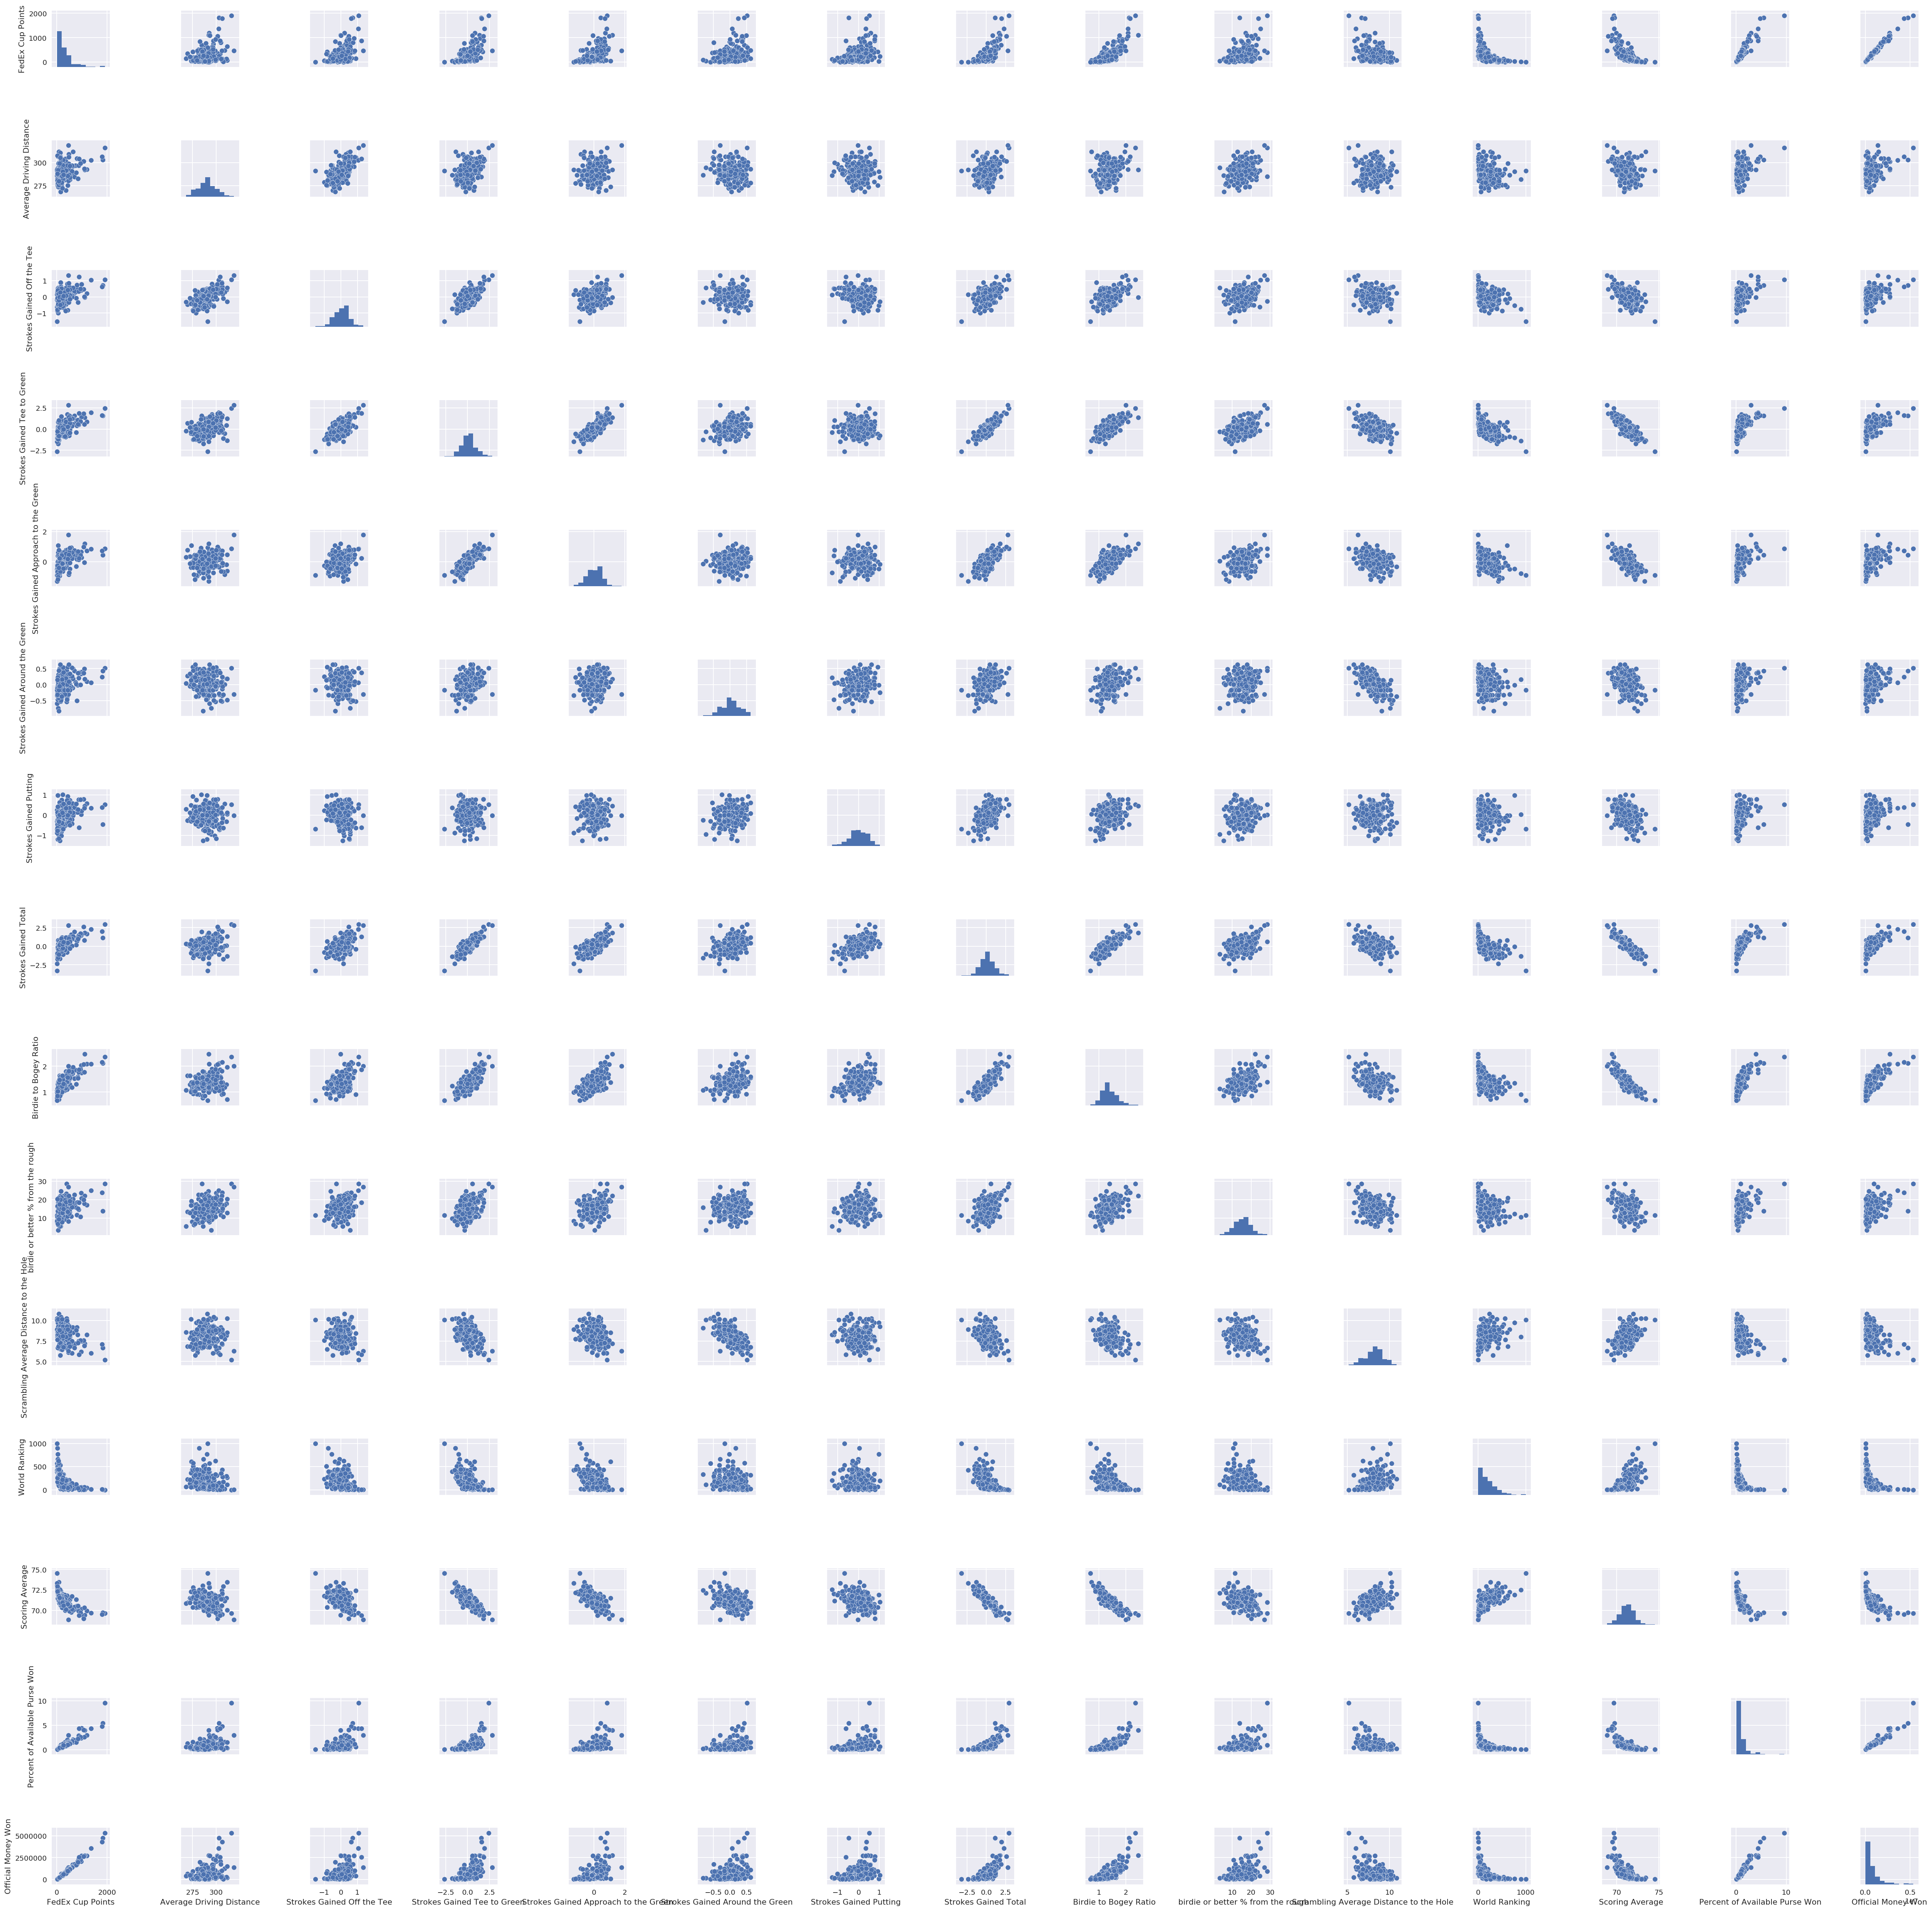

In [10]:
# was getting a warning about font style that made display unattractive
# so, imported warning library at beginning of notebook
# then used this line of code so warning would not be displayed
# only added this after everything else completed
# thanks to Joe Kambourakis for help with the filterwarnings
# https://docs.python.org/3.1/library/warnings.html
warnings.filterwarnings("ignore")

# this generates the pairplots
# http://seaborn.pydata.org/generated/seaborn.pairplot.html
sns.pairplot(golf)

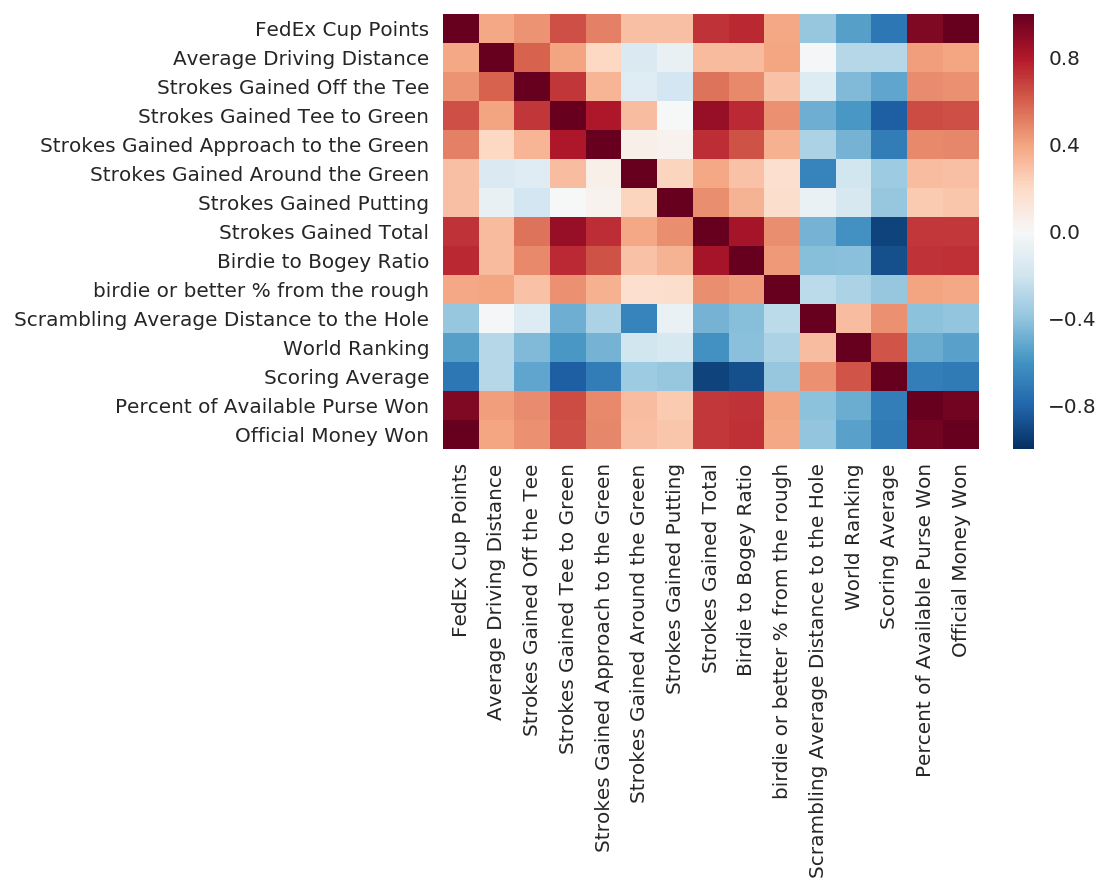

In [11]:
# http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html
# http://seaborn.pydata.org/generated/seaborn.heatmap.html
golf_corr = golf.corr()
sns.heatmap(golf_corr)

#### So, on the one hand, this is a gigantic mess.  On the other, with a few simple lines of code, we are able to get tons of charts that help us to narrow the scope of the data to use going forward.  
#### First, we see that FedEx Cup Points, Scoring Average, Percent of Available Purse Won and Official Money Won are all highly correlated.  For the purposes of moving forward, let's just focus on the money...after all the project is focused on drive for show, putt for dough, so we really care about comparing strokes to Money won.  We will create a new dataframe leaving the other proxies for money won out.  Also, we will leave out World Ranking, which is a function of several years of factors, so it will be a messy variable to keep in.
#### Second, it seems like the real value will be comparing all of the Strokes Gained variables with Money Won.  Those will be most relevant for the question at the beginning.
#### Third, if we focus on the bottom row of the correlation matrix as well as the bottom row of the pairplot output, we can see that Strokes Gained Tee to Green is looking like it is more highly correlated with Official Money Won than with the other Stokes Gained categories.  Also, it looks like Strokes gained off the Tee is more highly correlated than Strokes Gained Putting.
#### Finally, Average Driving Distance is less correlated with Money Won than Strokes Gained off the Tee.  So, we will drop that variable and just keep the Strokes Gained variables.  Then, re-run the pairplots and correlation matrix.

In [12]:
golf = golf.drop('FedEx Cup Points',axis=1)
golf = golf.drop('Average Driving Distance',axis=1)
golf = golf.drop('Strokes Gained Total',axis=1)
golf = golf.drop('Birdie to Bogey Ratio',axis=1)
golf = golf.drop('birdie or better % from the rough',axis=1)
golf = golf.drop('Scrambling Average Distance to the Hole',axis=1)
golf = golf.drop('World Ranking',axis=1)
golf = golf.drop('Scoring Average',axis=1)
golf = golf.drop('Percent of Available Purse Won',axis=1)

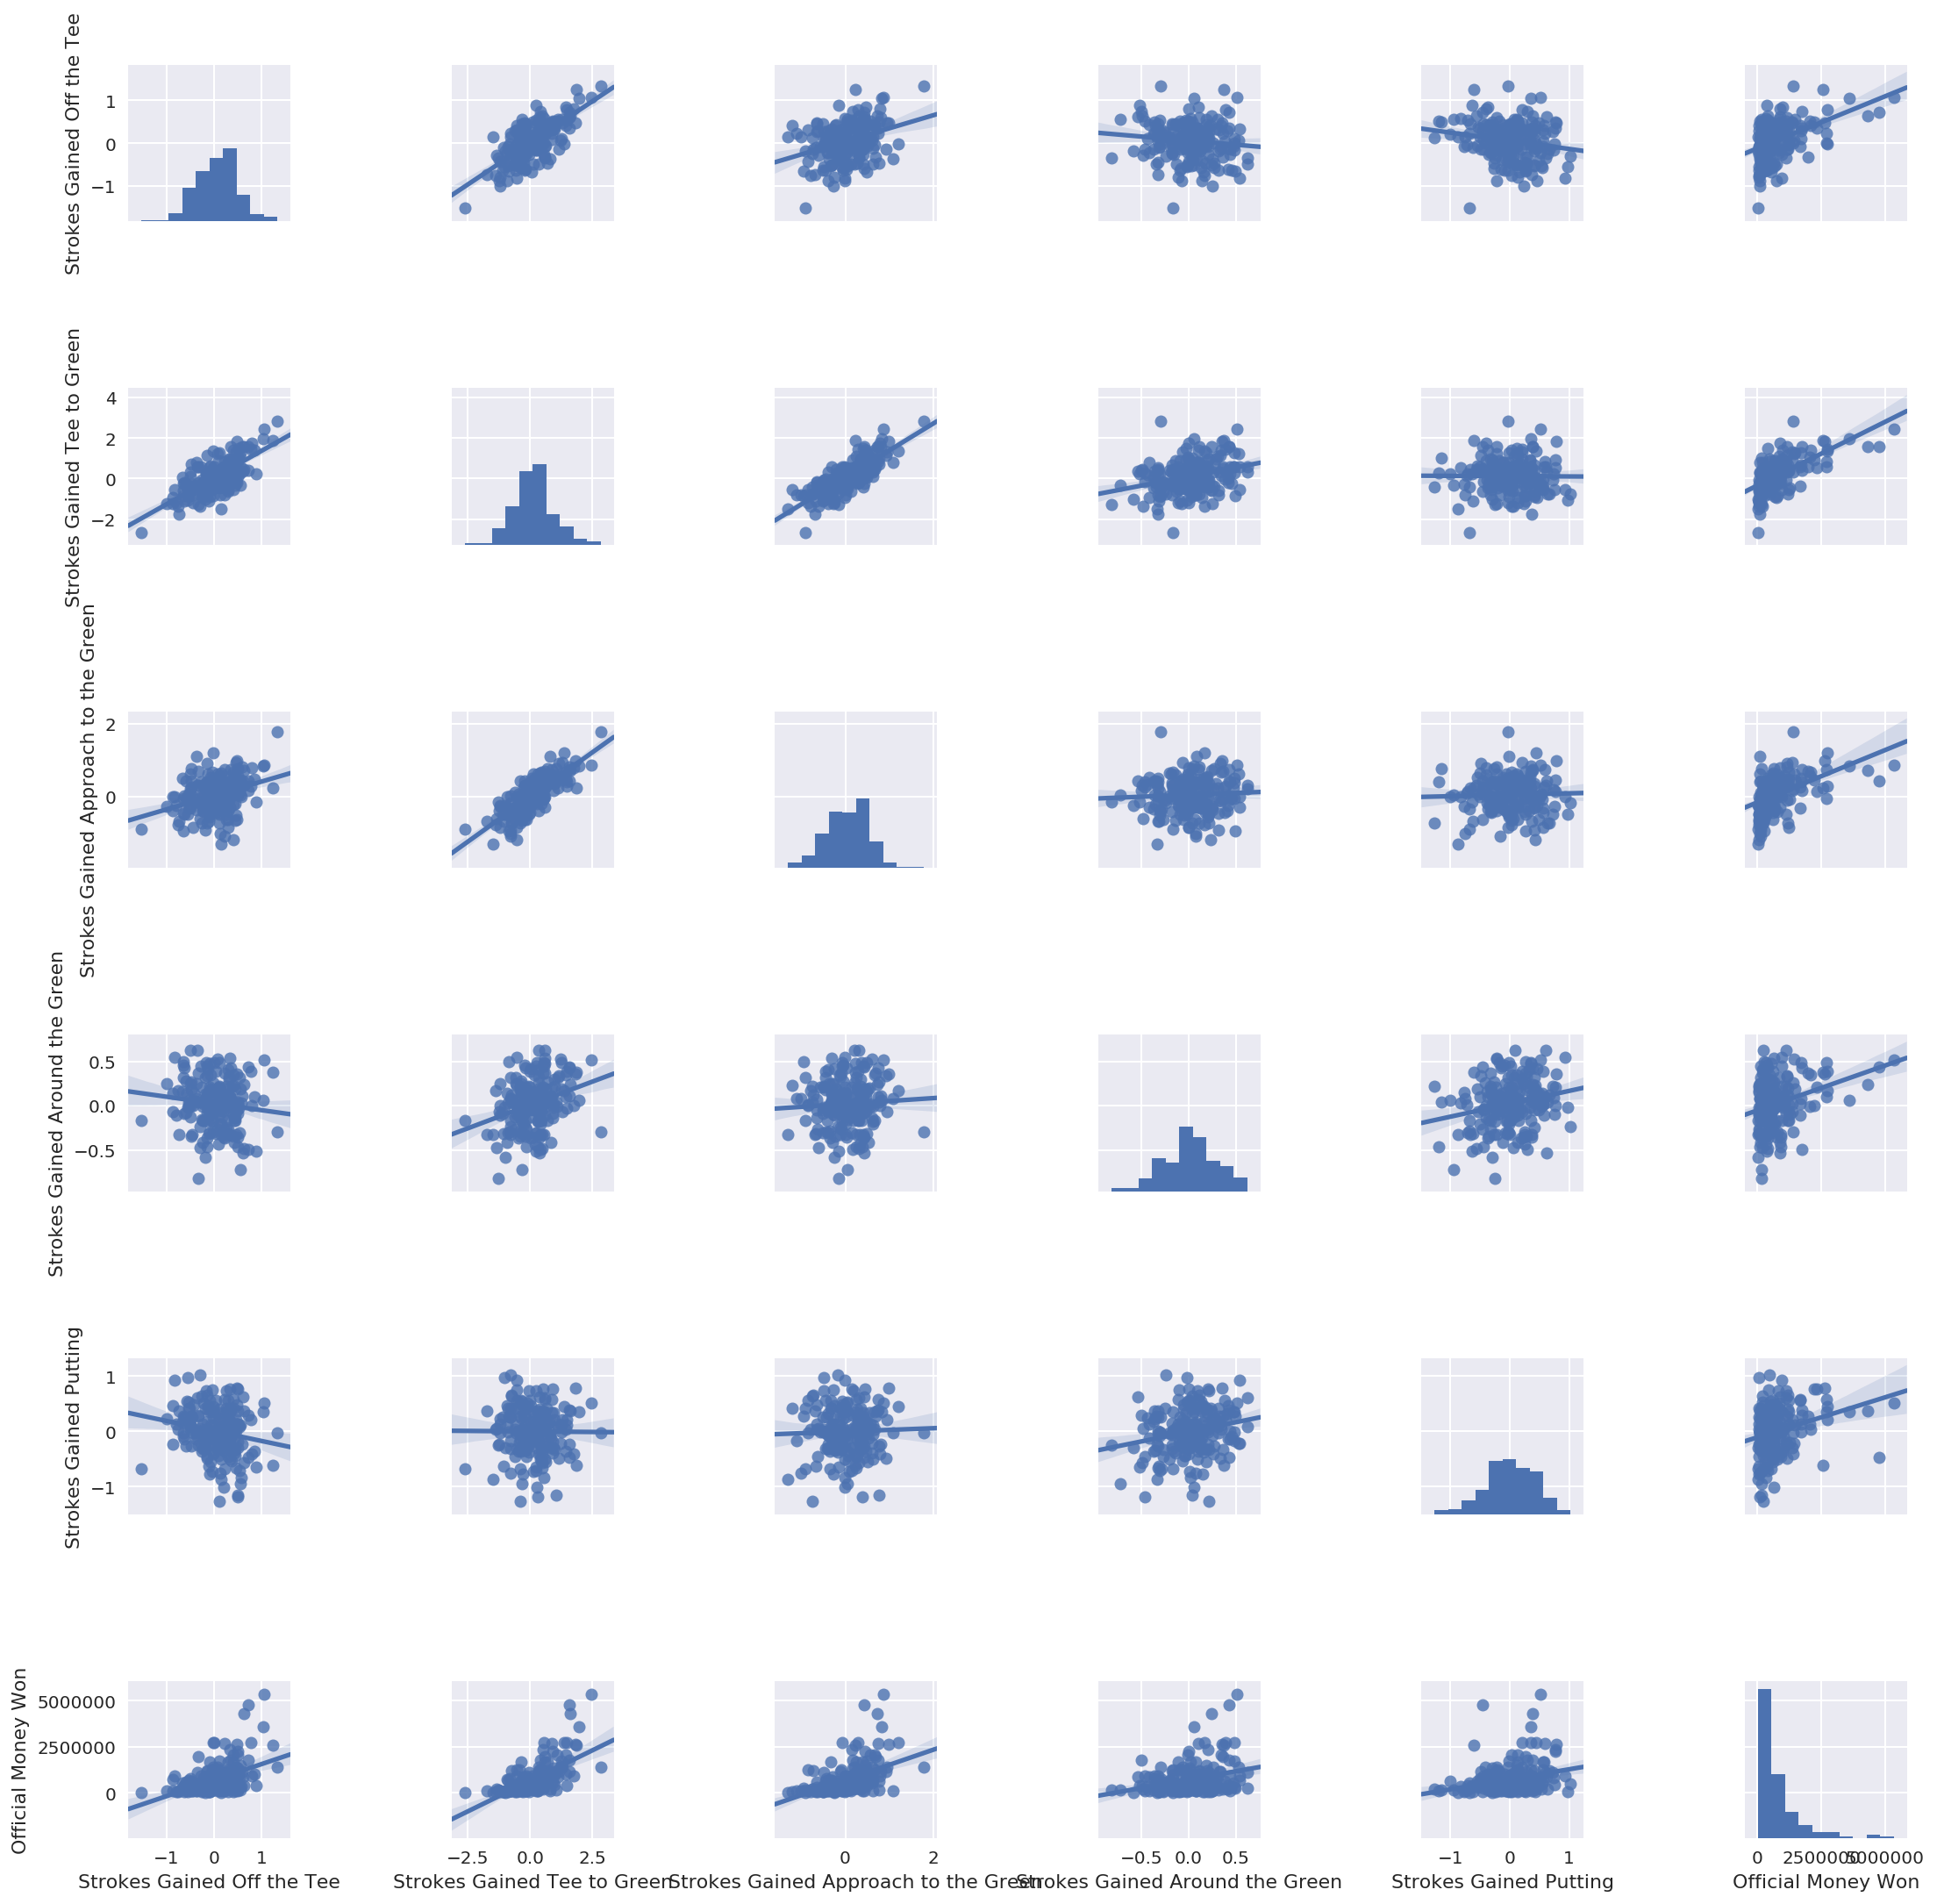

In [13]:
sns.pairplot(golf, kind='reg')

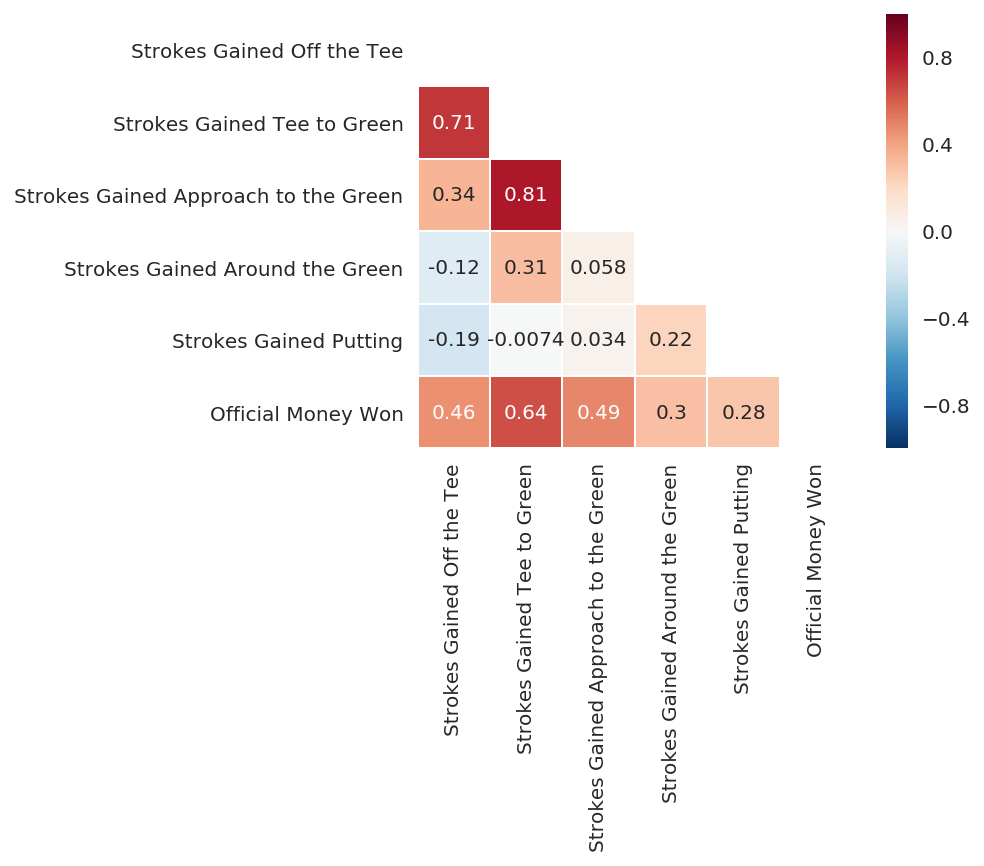

In [14]:
# correlation matrix
# erik ellis (from data science bootcamp class)
# helped me get started on the concept of this layout
# I then spent a bunch of time with the documentation at:
# http://seaborn.pydata.org/generated/seaborn.heatmap.html
golf_corr = golf.corr()
mask = np.zeros_like(golf_corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(golf_corr, mask=mask, square=True, annot=True, linewidths=0.5)


### Ah ha!  Now, we are starting to get some key insights!
### First, putting has the lowest correlation with Money Won at 0.28.  So much for putt for dough!
### Second, Strokes gained off the Tee (driving) is more correlated than putting at 0.46, but it's less correlated than Strokes gained tee to green at 0.64.
### Third, Strokes gained approach to the green has a bit higher correlation (0.48) than off the tee (0.46).  But, it's also highly correlated (0.81) with tee to green.
### We seem to have the pieces of a story.  Let's work on getting better visualizations to pull it together.

### 5. Create key data visualizations to tell a story

### "Drive for Show, Putt for Dough" is a Myth

In [15]:
# create a new DataFrame with just Money Won, Driving, Putting
golf_chart = golf
golf_chart = golf_chart.drop('Strokes Gained Approach to the Green',axis=1)
golf_chart = golf_chart.drop('Strokes Gained Around the Green',axis=1)
golf_chart = golf_chart.drop('Strokes Gained Tee to Green',axis=1)

# dataframe with correlation data
golf_chart_corr = golf_chart.corr()


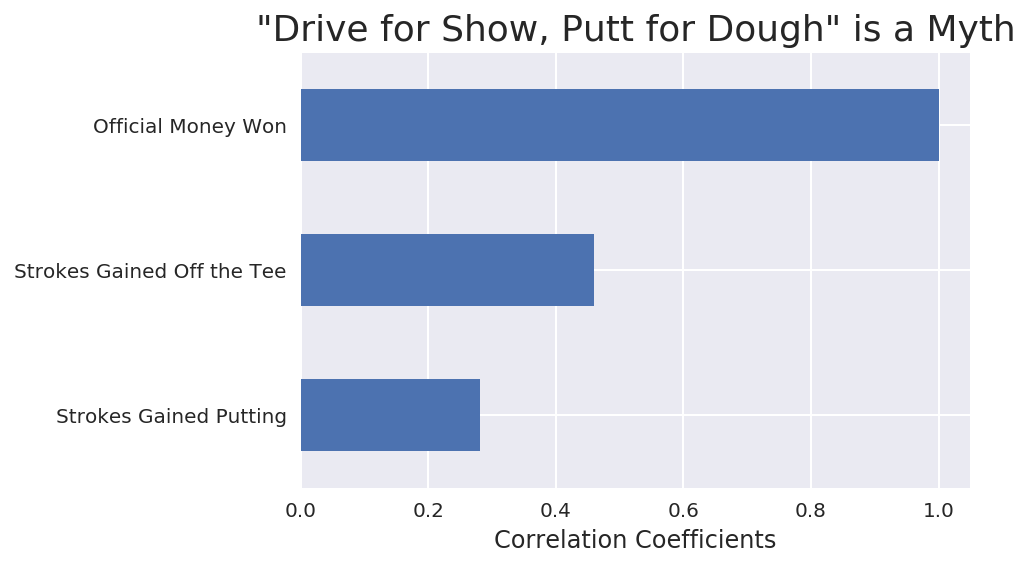

In [16]:
# output a simple bar chart of correlations with catchy title
# http://pandas.pydata.org/pandas-docs/stable/visualization.html

ax = golf_chart_corr['Official Money Won'].sort_values(ascending=True).plot.barh()

ax.set_xlabel('Correlation Coefficients', fontsize=12)
ax.set_title('"Drive for Show, Putt for Dough" is a Myth', fontsize=18)

plt.show()

### Strokes Gained Tee to Green = "Show Me the Money"

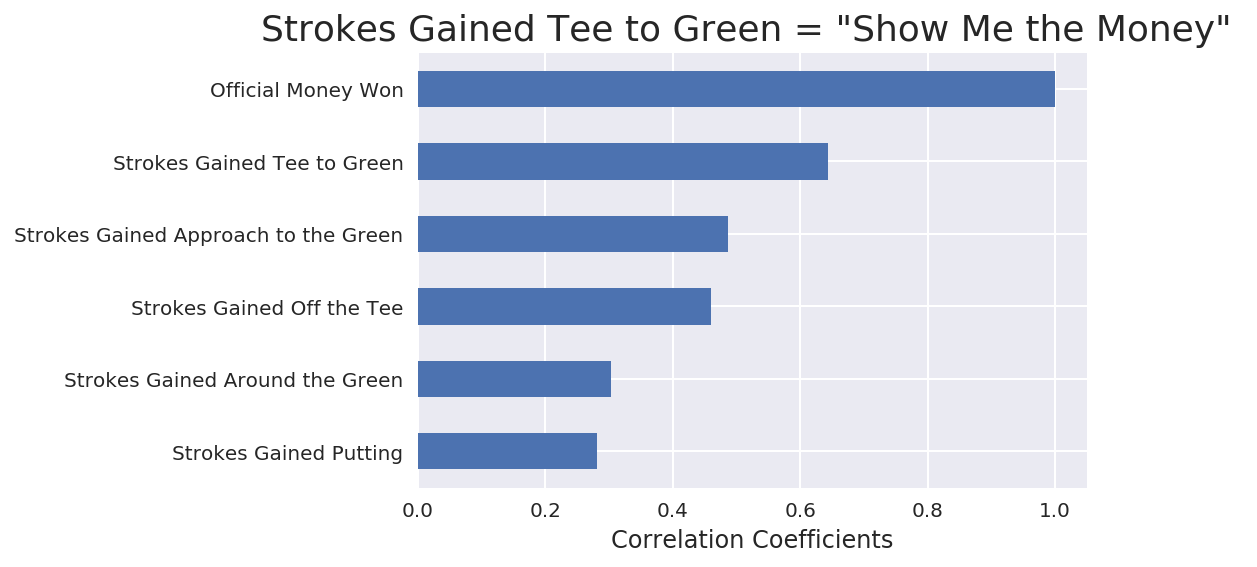

In [17]:
# output a simple bar chart of correlations with catchy title
# use the golf_corr dataframe from earlier that has all the Strokes Gained Variables

ax = golf_corr['Official Money Won'].sort_values(ascending=True).plot.barh()

ax.set_xlabel('Correlation Coefficients', fontsize=12)
ax.set_title('Strokes Gained Tee to Green = "Show Me the Money" ', fontsize=18)

plt.show()

### Pairplots allow us to visualize relationships between variables

In [18]:
# create a new DataFrame with just Money Won, Driving, Putting, Tee to Green
golf_pairplot = golf
golf_pairplot = golf_pairplot.drop('Strokes Gained Approach to the Green',axis=1)
golf_pairplot = golf_pairplot.drop('Strokes Gained Around the Green',axis=1)



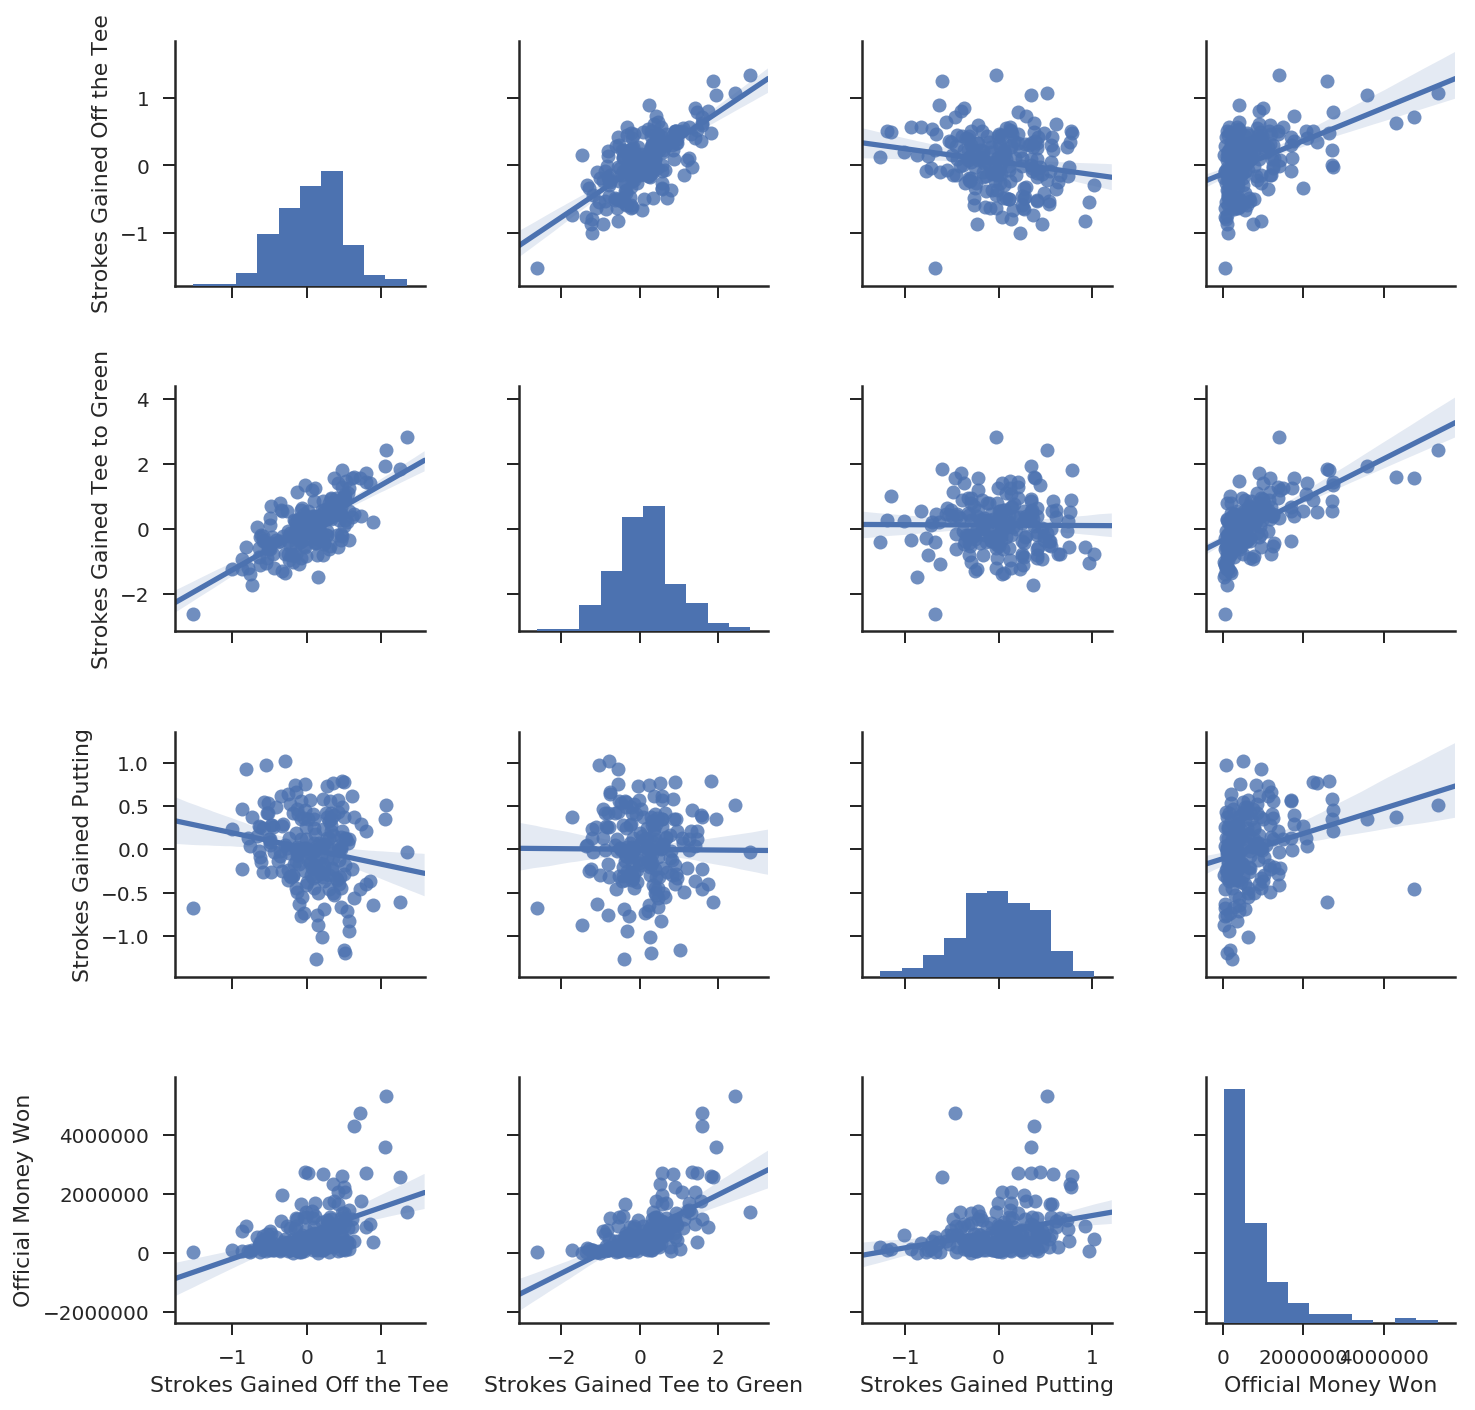

In [19]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(golf_pairplot, kind='reg')

### Interactive bokeh charts are really cool!
### On the chart below, highlight "box zoom" in the menu on the right.
### Then use the cursor to highlight a box of the chart to zoom into.

In [20]:
# this bokeh code allows us to box zoom and zero in on portions of the scatter plot
# we imported libraries at top of notebook; had we not, we would need the following here:
# from bokeh.plotting import figure
# from bokeh.io import output_notebook, show
# http://bokeh.pydata.org/en/latest/docs/user_guide.html
# http://bokeh.pydata.org/en/latest/docs/user_guide/plotting.html

strokes = golf['Strokes Gained Tee to Green']  # x-values
money = golf['Official Money Won']  # y-values

# Set up the figure
p = figure(plot_width=600,
           plot_height=400,
           x_axis_label='Strokes Gained Tee to Green',
           y_axis_label='Official Money Won',
          title="Strokes Gained Tee to Green versus Official Money Won")

p.circle(strokes, money)

output_notebook()
show(p)


Loading BokehJS ...

### Cool chart, but the y-axis is hard to read.
### Convert Official Money Won data to Thousand Dollars

In [21]:
# convert Official Money Won to $ Thousands for better label display
golf['Official Money Won'] = golf["Official Money Won"].map(lambda x: int(x/1000))
golf['Strokes Gained Tee to Green'] = (golf['Strokes Gained Tee to Green']
.map(lambda x: round(x,3)))
golf.head(2)

PLAYER NAME  Strokes Gained Off the Tee  Strokes Gained Tee to Green  \
0  Aaron Baddeley                      -0.618                       -0.184   
1     Adam Hadwin                       0.223                        0.856   

   Strokes Gained Approach to the Green  Strokes Gained Around the Green  \
0                                 0.021                            0.424   
1                                 0.735                            0.101   

   Strokes Gained Putting  Official Money Won  
0                  -0.141                 388  
1                   0.586                2702

### Now, use bokeh to create a hover tool.
### Put cursor over any of the points in the scatter plot and learn player's name, money and tee to green score.

In [22]:
# let's create a hover tool! very cool!
# we imported libraries at top of notebook; had we not, we would need the following here:
# from bokeh.plotting import figure
# from bokeh.io import output_notebook, show
# from bokeh.plotting import figure, output_file, show, ColumnDataSource
# from bokeh.models import HoverTool
# http://bokeh.pydata.org/en/latest/docs/user_guide/tools.html#hover-tool    
# output_file("toolbar.html")
# inspiration for this chart came from data science bootcamp

source = ColumnDataSource(
        data=dict(
            strokes = golf['Strokes Gained Tee to Green'],
            money = golf['Official Money Won'],
            name= golf['PLAYER NAME'],
        )
    )

hover = HoverTool(
        tooltips=[
            ("name", "@name"),
            ("(strokes,money)", "@strokes, @money"),
        ]
    )

p = figure(plot_width=600, plot_height=400, tools=[hover],
           title="Strokes Gained Tee to Green versus Official Money Won")

p.xaxis.axis_label = "Strokes Gained"
p.yaxis.axis_label = "Money Won (In $Thousand)"
p.xaxis.bounds = (-3,3)

p.circle('strokes', 'money', size=4, source=source)

output_notebook()

show(p)

Loading BokehJS ...

### Same chart as above, except x-axis is Strokes Gained Off the Tee.

In [23]:
source = ColumnDataSource(
        data=dict(
            strokes = golf['Strokes Gained Off the Tee'],
            money = golf['Official Money Won'],
            name= golf['PLAYER NAME'],
        )
    )

hover = HoverTool(
        tooltips=[
            ("name", "@name"),
            ("(strokes,money)", "@strokes, @money"),
        ]
    )

p = figure(plot_width=550, plot_height=350, tools=[hover],
           title="Strokes Gained Off the Tee versus Money Won")

p.xaxis.axis_label = "Strokes Gained"
p.yaxis.axis_label = "Money Won (In $Thousand)"

p.circle('strokes', 'money', size=3, source=source)

output_notebook()

show(p)

Loading BokehJS ...

### Same chart as above, except x-axis is Strokes Gained Putting.

In [24]:
source = ColumnDataSource(
        data=dict(
            strokes = golf['Strokes Gained Putting'],
            money = golf['Official Money Won'],
            name= golf['PLAYER NAME'],
        )
    )

hover = HoverTool(
        tooltips=[
            ("name", "@name"),
            ("(strokes,money)", "@strokes, @money"),
        ]
    )

p = figure(plot_width=550, plot_height=350, tools=[hover],
           title="Strokes Gained Putting versus Money Won")

p.xaxis.axis_label = "Strokes Gained"
p.yaxis.axis_label = "Money Won (In $Thousand)"

p.circle('strokes', 'money', size=3, source=source)

output_notebook()

show(p)

Loading BokehJS ...

### It seems like the relationship between Strokes Gained Tee to Green and Official Money Won might be exponential.
### Let's take the Log of Official Money Won and see if the correlations improve.

In [25]:
# https://docs.scipy.org/doc/numpy-1.10.1/reference/generated/numpy.log.html
golf['Log of Official Money Won'] = golf["Official Money Won"].apply(np.log)

In [26]:
golf.head(2)

PLAYER NAME  Strokes Gained Off the Tee  Strokes Gained Tee to Green  \
0  Aaron Baddeley                      -0.618                       -0.184   
1     Adam Hadwin                       0.223                        0.856   

   Strokes Gained Approach to the Green  Strokes Gained Around the Green  \
0                                 0.021                            0.424   
1                                 0.735                            0.101   

   Strokes Gained Putting  Official Money Won  Log of Official Money Won  
0                  -0.141                 388                   5.961005  
1                   0.586                2702                   7.901748

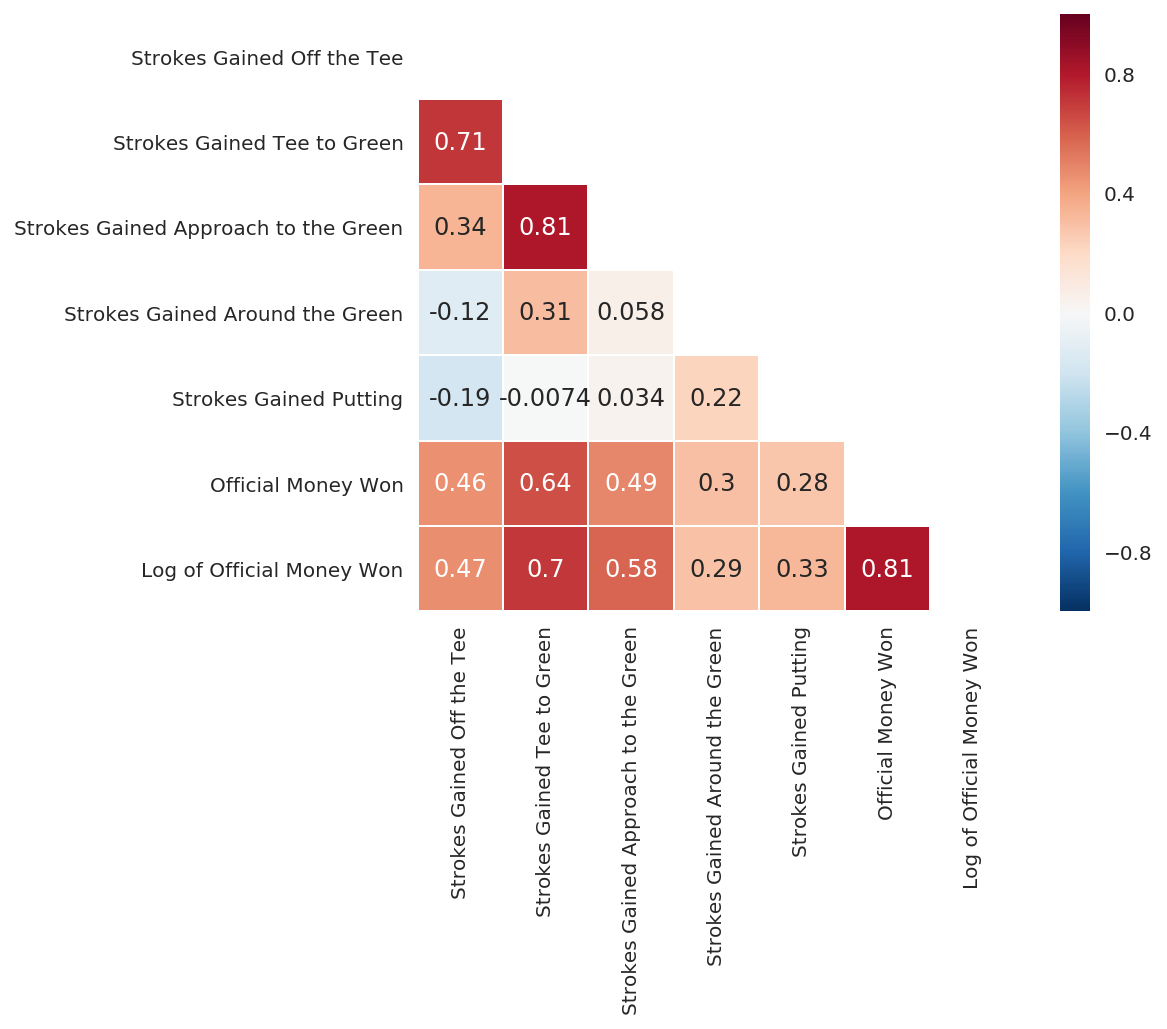

In [27]:
# same code as earlier
golf_corr = golf.corr()
mask = np.zeros_like(golf_corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(golf_corr, mask=mask, square=True, annot=True, linewidths=0.5)


### Looking at the last row above, we see Strokes Gained tee to Green has a 0.7 correlation with Log of Official Money Won!  Now we are talking.  Let's see the pairplots.

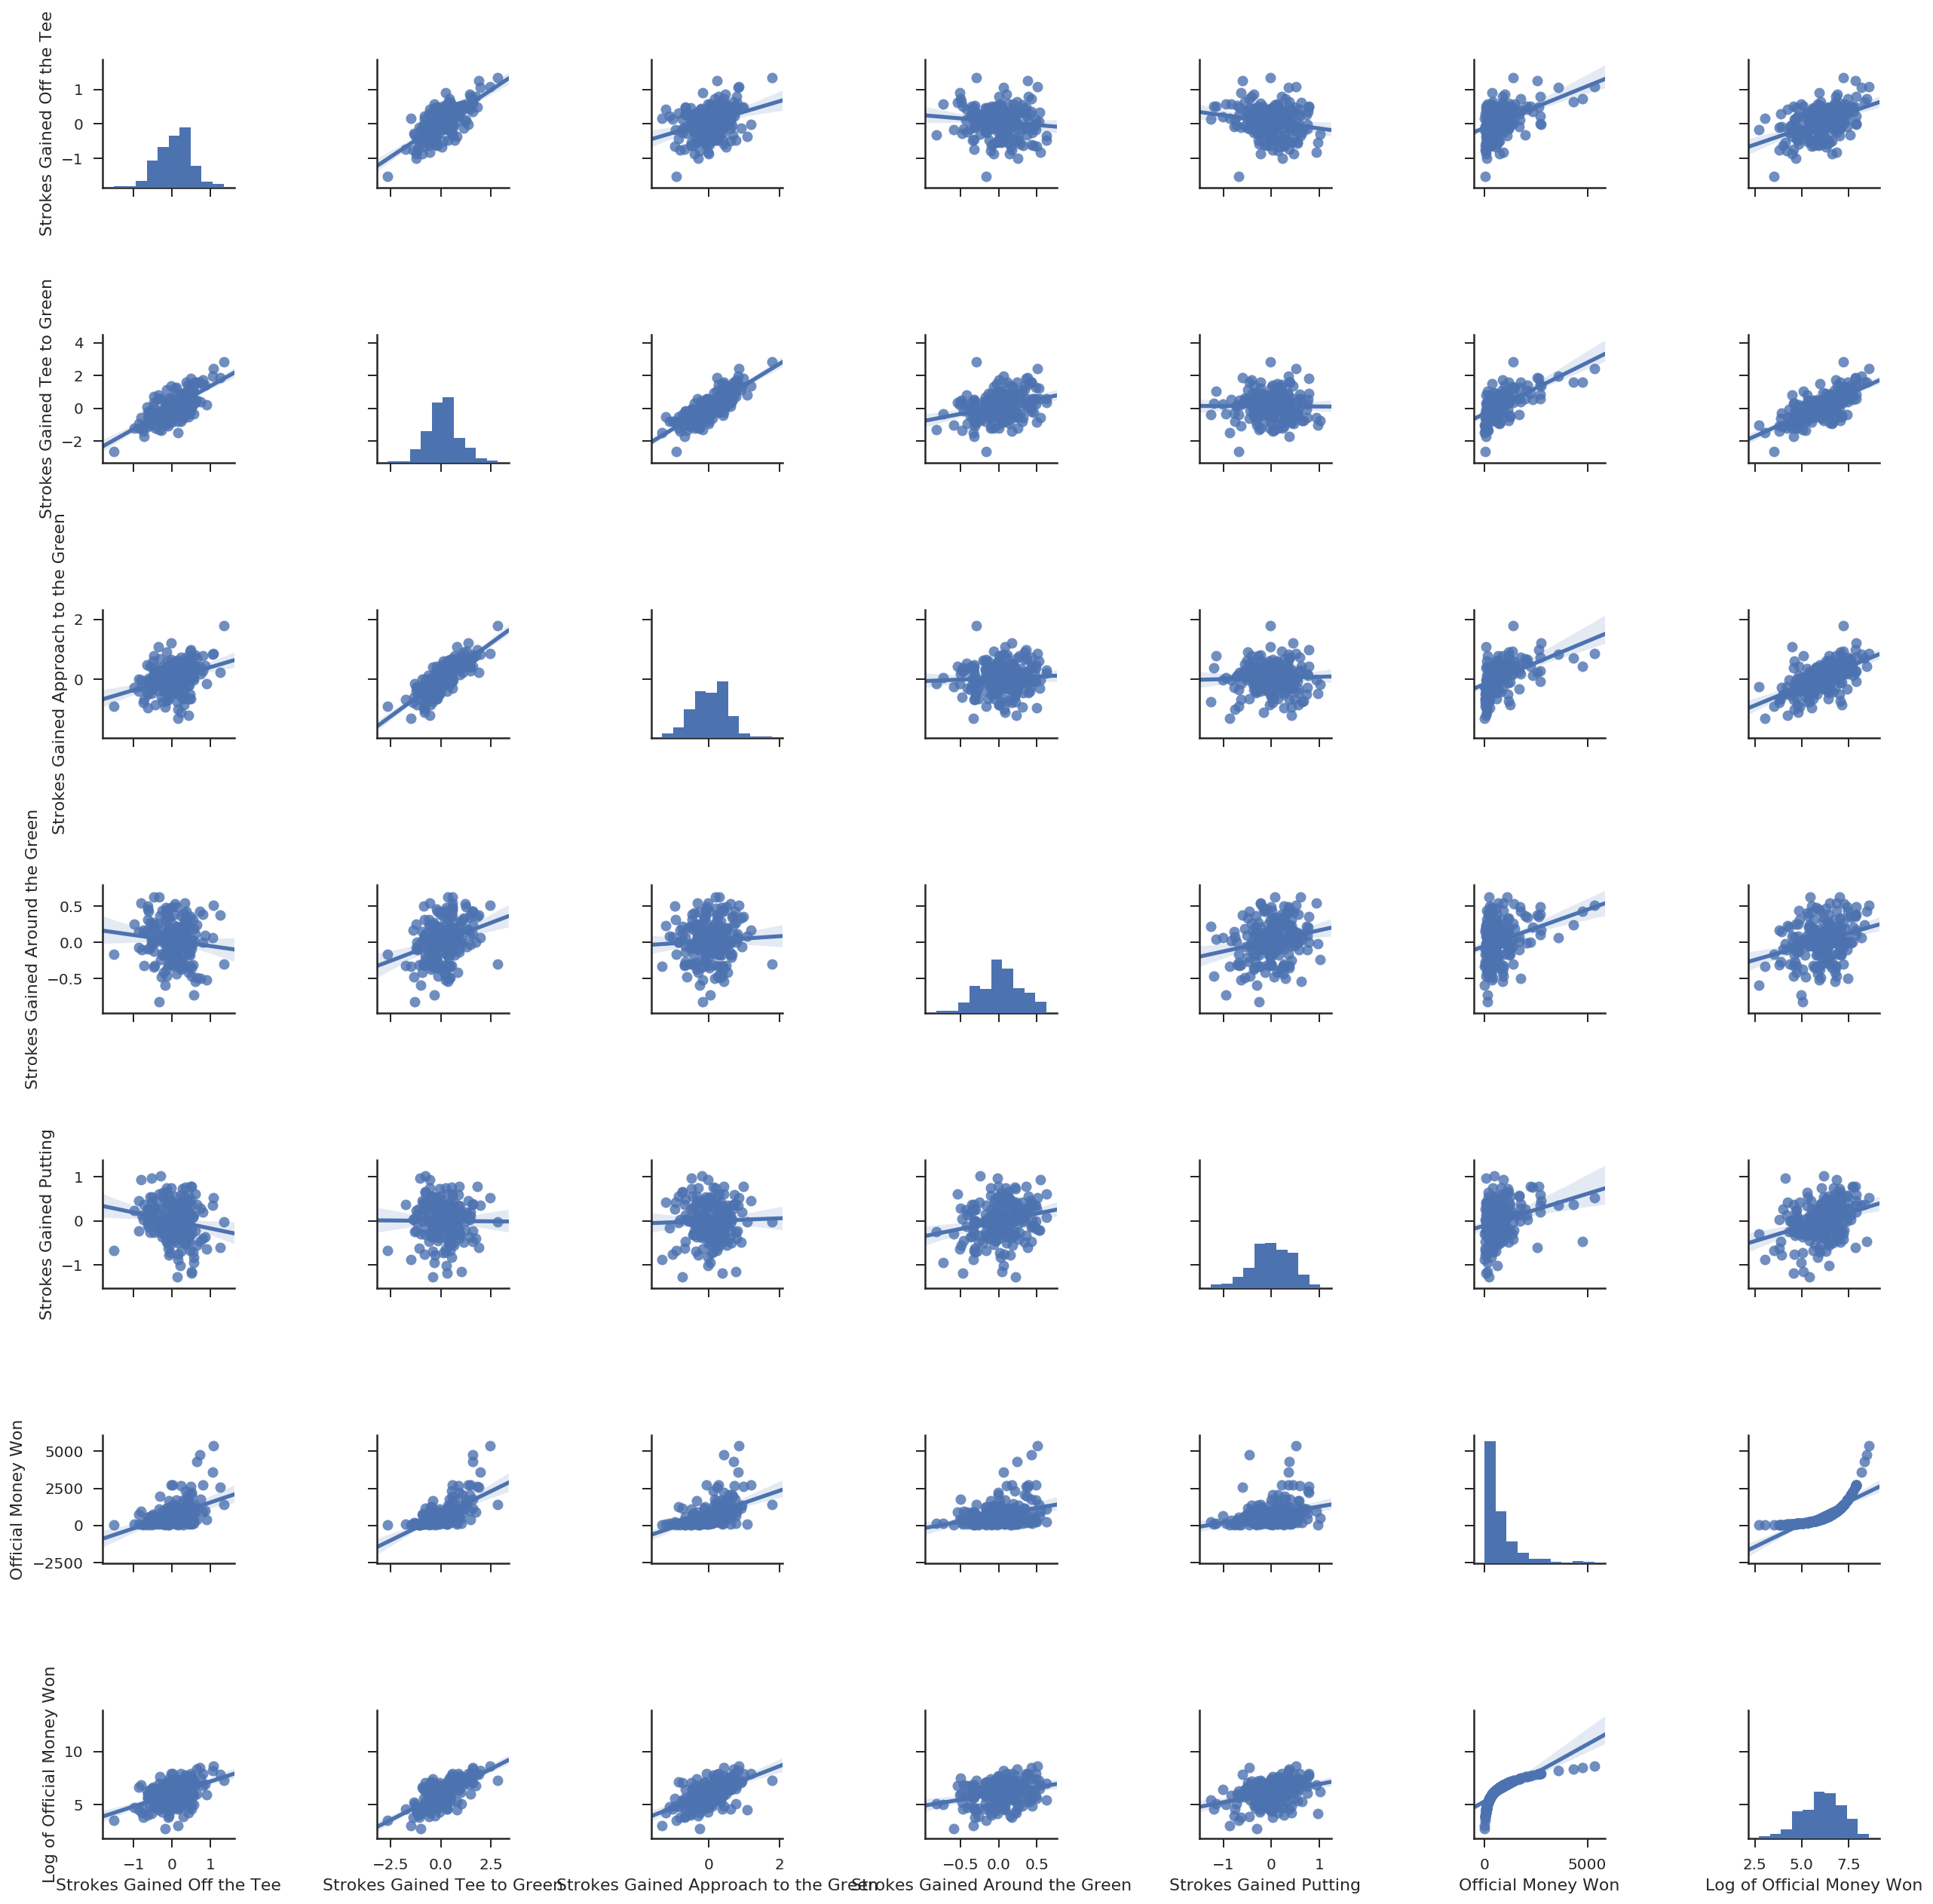

In [28]:
sns.pairplot(golf, kind = 'reg')

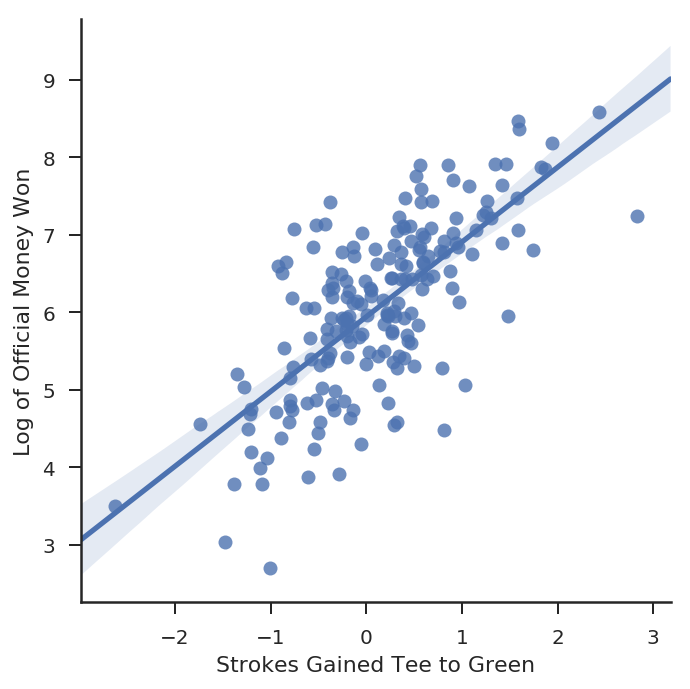

In [29]:
# http://seaborn.pydata.org/generated/seaborn.lmplot.html
sns.lmplot(x='Strokes Gained Tee to Green', y='Log of Official Money Won', data=golf)
plt.show()
# this is really interesting because the lmplot allow us to 
# It is intended as a convenient interface to fit regression models across conditional subsets of a dataset.
# we are seeing a linear relationship now that we have log of official money won


## Conclusions:
### "Drive for Show, Putt for Dough" is a Myth
### Strokes Gained Tee to Green = "Show Me the Money"
### Pairplots Allow us to Visualize Relationships Between Variables
### Bokeh makes really cool interactive visualizations
### The visualizations lead us to look at the log of Official Money Won which has a 0.7 correlation with Strokes Gained Tee to Green.  The last row of the pairplots gives a nice visual of the strong correlation.
### Python and Golf are a match made in heaven
### Thank you, Joe and Nenad, for a great course.
### I learned a ton and had lots of fun!!!